In [117]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  

#img_orig = cv2.imread('Fotos 1-11-097.jpeg') 
img_orig = cv2.imread('mosca.jpg') 

In [140]:
# marca el centro de masa
def mark_cdm (i): # i porción de imagen RGB 
    
    c = 15 # la cruz tiene 2*C de lado

    #imprime la imagen
    #plt.figure(figsize = (200,30))
    #plt.imshow(i) 

    eyes_lo=np.array([90,60,60])
    eyes_hi=np.array([125,85,85])

    mask=cv2.inRange(i,eyes_lo,eyes_hi)

    #imprime la mascara
    #plt.figure(figsize = (200,30))
    #plt.imshow(mask) 

    M = cv2.moments(mask)
 
    # calculate x,y coordinate of center
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
 
    # put text and highlight the center
    cv2.circle(i, (x, y), 5, (255, 255, 255), -1)
    cv2.putText(i, "target", (x - 25, y - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
    cv2.line(i, (x, y-c), (x, y+c), (255, 255, 0), 2) 
    cv2.line(i, (x-c, y), (x+c, y), (255, 255, 0), 2) 

    # imprime imagen
    plt.figure(figsize = (30,5))
    plt.imshow(i) 



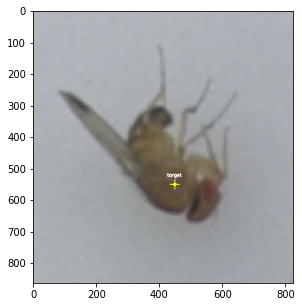

In [141]:
i3 = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
mark_cdm(i3)

In [ ]:
# show red

r = img_orig.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0



# RGB - Red

plt.figure(figsize = (200,20))
plt.imshow(r) 


#cv2.imshow('R-RGB', r)


In [ ]:
c=15

i = img_orig.copy()
i = cv2.cvtColor(i, cv2.COLOR_RGB2BGR)



rgb=i.copy()

plt.figure(figsize = (500,30))
plt.imshow(rgb) 


eyes_lo=np.array([90,60,60])
eyes_hi=np.array([125,85,85])


mask=cv2.inRange(rgb,eyes_lo,eyes_hi)

plt.figure(figsize = (500,30))
plt.imshow(mask) 


# Change image to red where we found brown
i[mask>0]=(255,0,0)     # RGB


M = cv2.moments(mask)
 
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
 
# put text and highlight the center
cv2.circle(i, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(i, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
x = cX
y = cY

print(i[x,y])
print(i[y,x])


cv2.line(i, (x, y-c), (x, y+c), (255, 255, 0), 2) 
cv2.line(i, (x-c, y), (x+c, y), (255, 255, 0), 2) 
plt.figure(figsize = (500,30))
plt.imshow(i) 


In [ ]:

_, img_thr = cv2.threshold(r, 100, 101, cv2.THRESH_BINARY)

#img_thr = cv2.adaptiveThreshold(img_, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
#_, img_thr = cv2.threshold(img_, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize = (200,20))
plt.imshow(img_thr, cmap="gray") 

In [ ]:
#j = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
#j = cv2.cvtColor(img_orig, cv2.COLOR_BGR2HSV)
#j = cv2.cvtColor(img_orig, cv2.COLOR_BGR2HLS)
#j = cv2.cvtColor(img_orig, cv2.COLOR_BGR2LAB)
#j = cv2.cvtColor(img_orig, cv2.COLOR_BGR2LUV)
j = cv2.cvtColor(img_orig, cv2.COLOR_BGR2YUV)

plt.figure(figsize = (200,20))
plt.imshow(j) 

